In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import FancyBboxPatch

root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/'
msk_dir = f"{root_dir}/global_city/dat/vld_cty_"
prf_dir = f"{root_dir}/global_city/dat/cty_prf_"
wup_path = f"{root_dir}/global_city/dat/cty_lst_/gpw4/WUP2018_300k_2010_regionadded.txt"
class_path = f"{root_dir}/global_city/dat/non_prf_/vld_cty_/classification.txt"
gpw_path = f"{root_dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5"
riv_path = f"{root_dir}/global_city/dat/riv_out_/W5E5LR__00000000.gl5"
log_path = f"{root_dir}/global_city/dat/cty_lst_/gpw4/cluster.log"
mcy_path = f"{root_dir}/global_city/dat/cty_lst_/gpw4/mcy_pop_water.txt"

save_file = f"{root_dir}/global_city/dat/cty_lst_/gpw4/potential.txt"

In [40]:
#mcy = [citynum, flag, rate, wup, pop, avail, mpcy, gridnum, region, country, cityname]
with open(mcy_path, 'r') as files:
    text = files.readlines()

data = []

for ind in range(1860):
    line = text[ind]
    parts = line.split('|')
    parts = [item.strip() for item in parts]
    city_num = int(parts[0])
    flag = parts[1]
    if flag == 'NoMASK':
        continue
    else:
        rate = parts[2]
        wup = float(parts[3])
        wup_unit = wup/1e3
        dwn = float(parts[4])
        dwn_unit = dwn/1e6
        ava = float(parts[5])
        ava_unit = ava/1e9
        mcy = float(parts[6])
        if ava_unit > dwn_unit:
            scarsity = '○'
        else:
            scarsity = '●'
        cel = int(float(parts[7]))
        region = parts[8]
        country = parts[9]
        city_name = parts[10]
        potential = ava_unit - dwn_unit

    data.append([city_num, city_name, scarsity, wup_unit, dwn_unit, ava_unit, mcy, potential, region, country])

#df = pd.DataFrame(data, columns=['city_num', 'city_name', 'population[Million]', 'water availability[Million m3]', 'MPCY', 'region', 'country'])
df = pd.DataFrame(data, columns=['city_num', 'city_name', 'scarcity', 'wup', 'population', 'water availability', 'MPCY', 'potential', 'region', 'country'])
df_sorted = df.sort_values(by='population', ascending=False)

def round_significant(x, sig=2):
    return round(x, sig - int(np.floor(np.log10(abs(x))))- 1)
                 
df_sorted['wup'] = df_sorted['wup'].apply(lambda x: round_significant(x))
df_sorted['population'] = df_sorted['population'].apply(lambda x: round_significant(x))
df_sorted['water availability'] = df_sorted['water availability'].apply(lambda x: round_significant(x))
df_sorted['MPCY'] = df_sorted['MPCY'].apply(lambda x: round_significant(x))
df_sorted['potential'] = df_sorted['potential'].apply(lambda x: round_significant(x))
                 
print(len(df_sorted))
df_sorted.head(35)

1553


,city_num,city_name,scarcity,wup,population,water availability,MPCY,potential,region,country
0,1,Tokyo,●,37.0,32.0,14.000,450.0,-18.00,eastern asia,Japan
1,2,Delhi,●,22.0,22.0,4.400,200.0,-18.00,southern asia,India
3,4,Ciudad de México (Mexico City),●,20.0,20.0,0.300,15.0,-20.00,central america,Mexico
8,9,Al-Qahirah (Cairo),○,17.0,17.0,710.000,42000.0,690.00,northern africa,Egypt
10,11,Dhaka,●,15.0,15.0,0.096,6.4,-15.00,southern asia,Bangladesh
2,3,Shanghai,○,20.0,15.0,16.000,1100.0,1.90,eastern asia,China
12,13,Kolkata (Calcutta),○,14.0,14.0,32.000,2200.0,17.00,southern asia,India
7,8,Mumbai (Bombay),●,18.0,14.0,9.300,650.0,-5.00,southern asia,India
9,10,Beijing,●,16.0,14.0,2.400,170.0,-11.00,eastern asia,China
11,12,Buenos Aires,●,14.0,13.0,0.700,53.0,-13.00,south america,Argentina


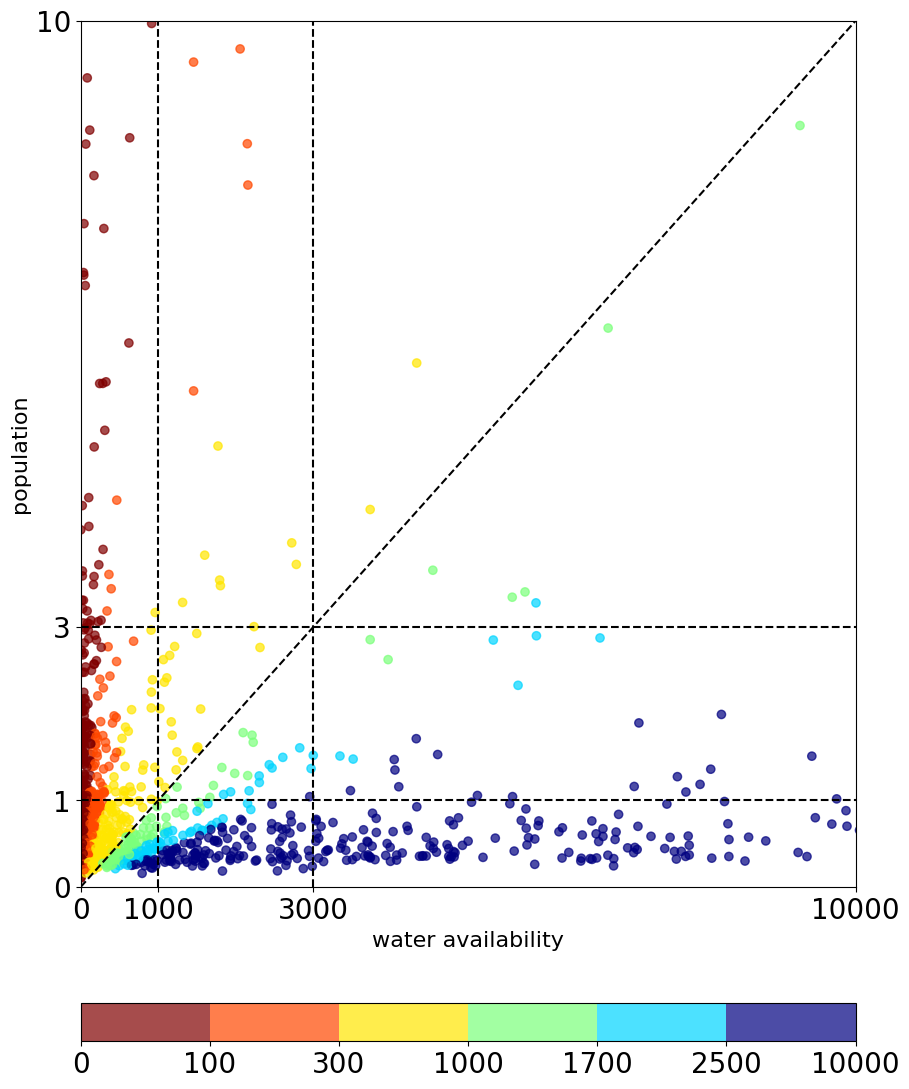

In [42]:
plt.rcParams.update({'font.size': 20})  
fig, ax = plt.subplots(figsize=(10,15))

#colors = ['#f1f1f1' if ava > 1 or pop <= 0.3 else 'black' for ava, pop in zip(df['water availability'], df['population'])]
ava = df['water availability']*1e3
pop = df['population']
ratio = ava/pop
bounds = [0, 100, 300, 1000, 1700, 2500, 10000]
cmap = plt.get_cmap('jet_r', len(bounds))  # 10個の離散値
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# 散布図を作成
scatter = ax.scatter(ava, pop, c=ratio, cmap=cmap, norm=norm, alpha=0.7)

# x軸に垂直な線分で区切る
ax.axvline(x=1000, color='black', linestyle='--')
ax.axvline(x=3000, color='black', linestyle='--')

# y軸に垂直な線分で区切る
ax.axhline(y=1, color='black', linestyle='--')
ax.axhline(y=3, color='black', linestyle='--')

# linear
ax.plot(np.arange(0, 50*1e3, 1000), np.arange(0, 50), color='black', linestyle='--')

alpha = 0.25
#ax.axvspan(0, 1, 0, 0.1, facecolor='darkorange', alpha=alpha)
#ax.axvspan(0, 1, ymin=0.1, ymax=1, facecolor='#a52a2a', alpha=alpha)
#ax.axvspan(1, 2, ymin=0,   ymax=0.5, facecolor='lightblue', alpha=alpha)
#ax.axvspan(1, 2, ymin=0.5, ymax=1, facecolor='yellow', alpha=alpha)

# 軸範囲を設定
plt.xlabel('water availability', fontsize=16)
plt.ylabel('population', fontsize=16)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.xticks([0, 1000, 3000, 10000])
plt.yticks([0, 1, 3, 10])

plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.1)
plt.show()

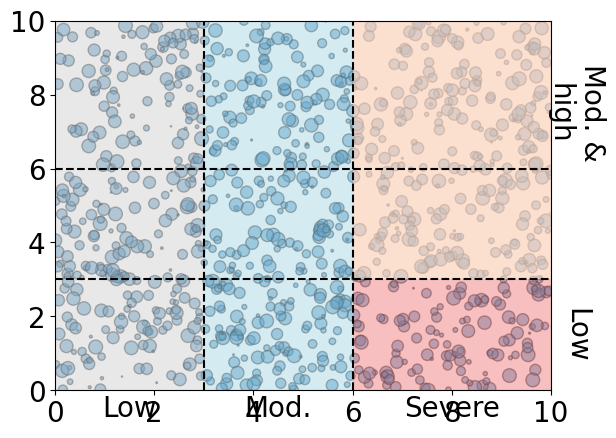

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# サンプルデータを生成
x = np.random.rand(1000) * 10
y = np.random.rand(1000) * 10
sizes = np.random.rand(1000) * 100

# 散布図を作成
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, s=sizes, alpha=0.5, edgecolors="k")

# x軸に垂直な線分で区切る
ax.axvline(x=3, color='black', linestyle='--')
ax.axvline(x=6, color='black', linestyle='--')

# y軸に垂直な線分で区切る
ax.axhline(y=3, color='black', linestyle='--')
ax.axhline(y=6, color='black', linestyle='--')

# 色付きの背景を追加
# 低、中、高、重度の領域を色分け
ax.axvspan(0, 3, facecolor='lightgrey', alpha=0.5)
ax.axvspan(3, 6, facecolor='lightblue', alpha=0.5)
ax.axvspan(6, 10, facecolor='lightcoral', alpha=0.5)

ax.axhspan(3, 10, xmin=0.6, xmax=1.0, facecolor='lightyellow', alpha=0.5)

# ラベルを追加
ax.text(1.5, -0.5, 'Low', ha='center', va='center')
ax.text(4.5, -0.5, 'Mod.', ha='center', va='center')
ax.text(8, -0.5, 'Severe', ha='center', va='center')
ax.text(10.5, 7.5, 'Mod. &\nhigh', ha='center', va='center', rotation=-90)
ax.text(10.5, 1.5, 'Low', ha='center', va='center', rotation=-90)

# 軸範囲を設定
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()


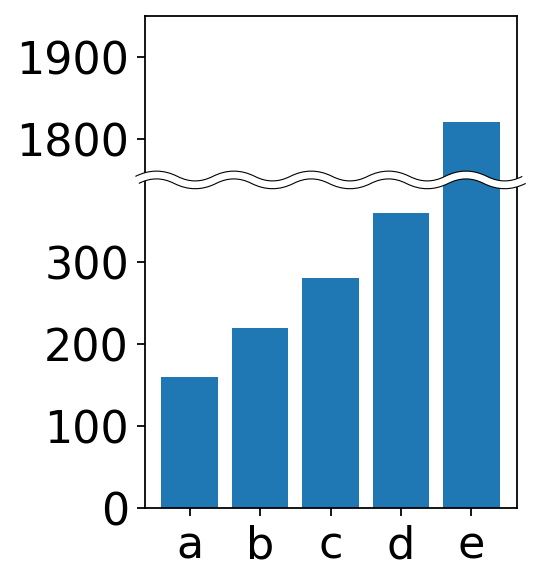

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.path import Path

left   = np.array(['a', 'b', 'c', 'd', 'e'])
height = np.array([160, 220, 280, 360, 1820])

# サブプロット2行1列のサブプロットを用意(2象限に分けている)
fig, ax = plt.subplots(nrows=2, figsize=(3,4), dpi=160, sharex='col',
                       gridspec_kw={'height_ratios': (1,2)} )

fig.patch.set_facecolor('white') # 背景色を「白」に設定

ax[0].bar(left,height) # 上段
ax[1].bar(left,height) # 下段
fig.subplots_adjust(hspace=0.0)  
ax[1].set_ylim(0,400)  # 区間幅 400
ax[1].set_yticks(np.arange(0,300+1,100))

# 上段サブプロット
ax[0].set_ylim(1750,1950)  # 区間幅 200
ax[0].set_yticks((1800,1900))

# 下段のプロット領域上辺を非表示
ax[1].spines['top'].set_visible(False)

# 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
ax[0].spines['bottom'].set_visible(False)
ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
d1 = 0.02 # X軸のはみだし量
d2 = 0.03 # ニョロ波の高さ
wn = 21   # ニョロ波の数（奇数値を指定）

pp = (0,d2,0,-d2)
px = np.linspace(-d1,1+d1,wn)
py = np.array([1+pp[i%4] for i in range(0,wn)])
p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))

line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=ax[1].transAxes, zorder=10)

line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=ax[1].transAxes, zorder=10,
                           capstyle='round')

a = ax[1].add_patch(line1)
a = ax[1].add_patch(line2)

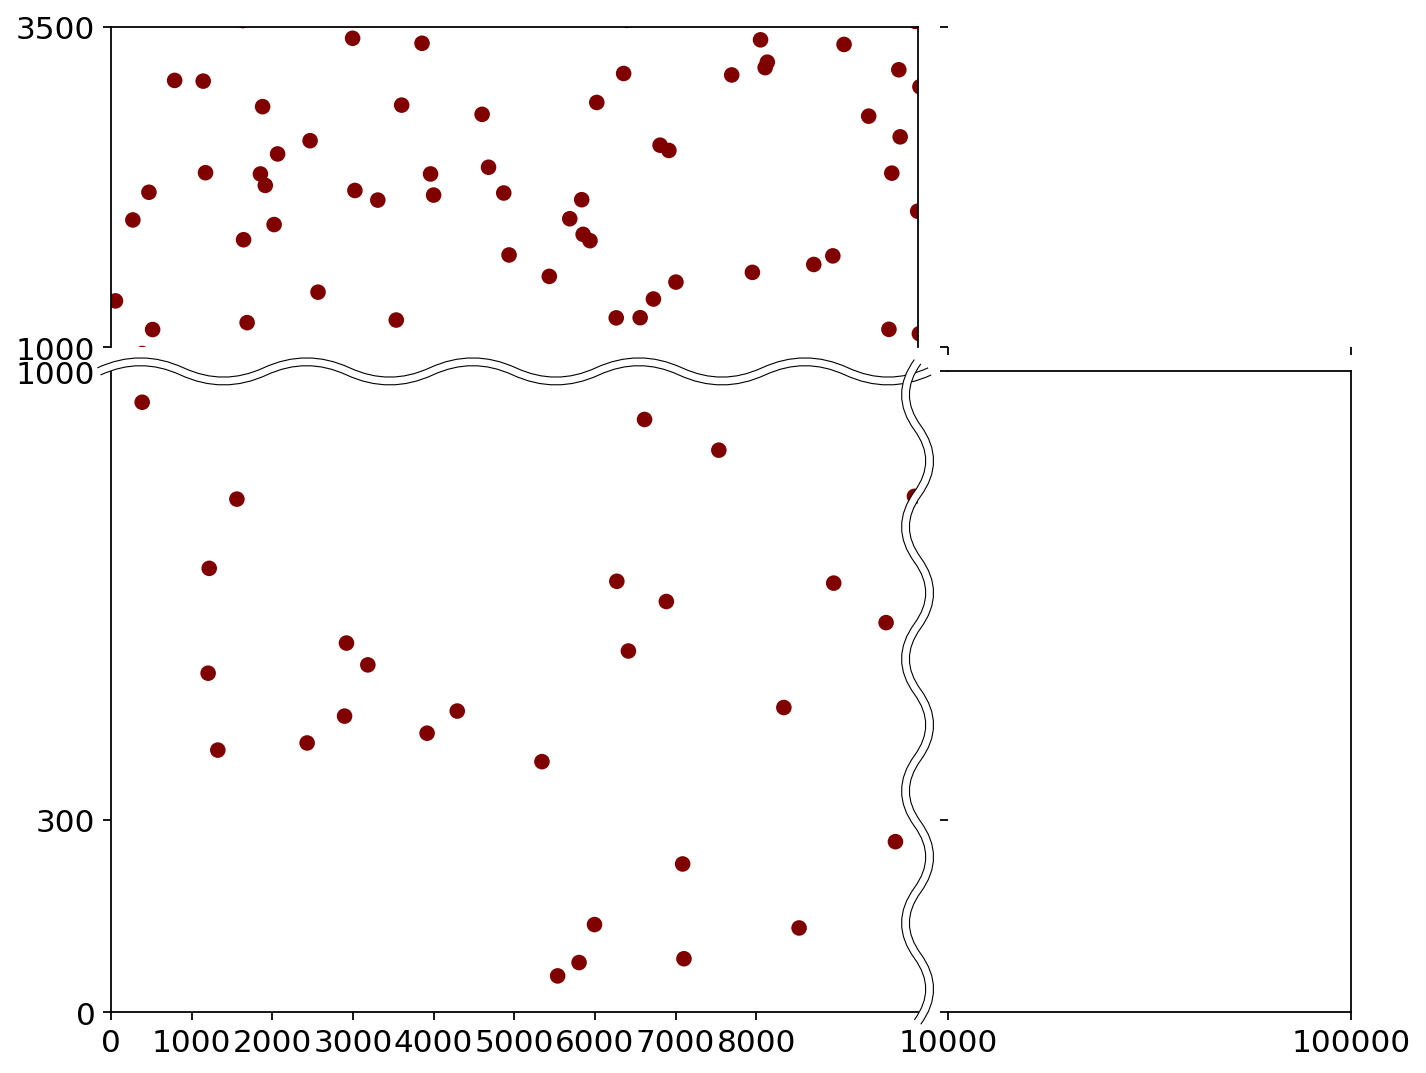

In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# サンプルデータを生成
np.random.seed(0)
ava = np.random.uniform(0, 100000, 1000)
pop = np.random.uniform(0, 4000, 1000)
ratio = ava / pop

# カラーマップとノルムを定義
bounds = [0, 100, 300, 1000, 1700, 2500, 10000]
cmap = plt.get_cmap('jet_r', len(bounds))
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# 図と軸を作成
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=160, 
                        gridspec_kw={'height_ratios': [1, 2], 'width_ratios': [2, 1]}, 
                        sharex='col', sharey='row')

fig.subplots_adjust(hspace=0.05, wspace=0.05)

# フォントサイズの設定
plt.rcParams.update({'font.size': 14})

# 散布図を描画（左下のサブプロット）
sc = axs[1, 0].scatter(ava, pop, c=ratio, cmap=cmap, norm=norm)

# カラーバーを追加
#cbar = plt.colorbar(sc, ax=axs[1, 0], spacing='proportional', ticks=bounds, pad=0.3, orientation ='horizontal')
#cbar.set_label('Water Availability per Population', fontsize=16)

# 上段左のプロット
axs[0, 0].scatter(ava, pop, c=ratio, cmap=cmap, norm=norm)
axs[0, 0].set_ylim(1000, 3500)  # Y軸の範囲を設定
axs[0, 0].set_yticks([1000, 3500])
axs[0, 0].spines['bottom'].set_visible(False)
axs[0, 0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# 下段右のプロット
axs[1, 1].set_xlim(10000, 100000)  # X軸の範囲を設定
axs[1, 1].set_xticks([10000, 100000])
axs[1, 1].spines['left'].set_visible(False)

# 下段左のプロット
axs[1, 0].set_ylim(0, 400)  # Y軸の範囲を設定
axs[1, 0].set_yticks([0, 300, 1000])
axs[1, 0].set_xlim(0, 10000)  # Y軸の範囲を設定
axs[1, 0].set_xticks(np.arange(0, 9000, 1000))
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)

# 上段右のプロット
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['bottom'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['left'].set_visible(False)

# 省略線を追加する関数
def break_line(ax, pos, axis='x', d1=0.015, d2=0.03, wn=21, **kwargs):
    pp = (0,d2,0,-d2)
    px = np.linspace(-d1,1+d1,wn)
    py = np.array([1+pp[i%4] for i in range(0,wn)])
    if axis == 'x':
        p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
        line1 = PathPatch(p, lw=4, edgecolor='black', facecolor='None', clip_on=False, transform=ax.transAxes, zorder=10)
        line2 = PathPatch(p, lw=3, edgecolor='white', facecolor='None', clip_on=False, transform=ax.transAxes, zorder=10, capstyle='round')
        ax.add_patch(line1)
        ax.add_patch(line2)
    elif axis == 'y':
        p = Path(list(zip(py,px)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))
        line1 = PathPatch(p, lw=4, edgecolor='black', facecolor='None', clip_on=False, transform=ax.transAxes, zorder=10)
        line2 = PathPatch(p, lw=3, edgecolor='white', facecolor='None', clip_on=False, transform=ax.transAxes, zorder=10, capstyle='round')
        ax.add_patch(line1)
        ax.add_patch(line2)

# Y軸の省略線を追加（左上と左下の間）
break_line(axs[1, 0], 300, axis='x')

# X軸の省略線を追加（上段左と下段左の間）
break_line(axs[1,0], 10000, axis='y')

# グラフのラベルとタイトルを設定（フォントサイズを個別に指定）
#axs[1, 0].set_xlabel('Water Availability', fontsize=16)
#axs[1, 0].set_ylabel('Population', fontsize=16)
#axs[0, 0].set_title('Scatter Plot of Water Availability vs Population', fontsize=18)

# グリッドを表示
#axs[1, 0].grid(True)

plt.show()


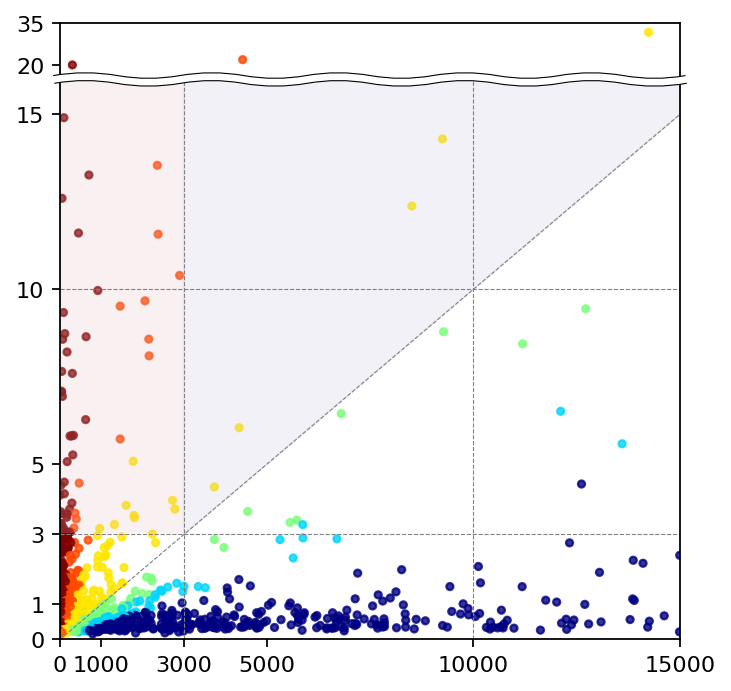

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.path import Path

plt.rcParams.update({'font.size': 10})  
fig, ax = plt.subplots(nrows=2, figsize=(5,5), dpi=160, sharex='col',
                       gridspec_kw={'height_ratios': (1,10)} )
fig.patch.set_facecolor('white') # 背景色を「白」に設定

ava = df['water availability']*1e3
pop = df['population']
ratio = ava/pop
bounds = [0, 100, 300, 1000, 1700, 2500, 10000]
cmap = plt.get_cmap('jet_r', len(bounds))  # 10個の離散値
norm = mcolors.BoundaryNorm(bounds, cmap.N)

scatter = ax[0].scatter(ava, pop, c=ratio, s=10, cmap=cmap, norm=norm, alpha=0.8)
scatter = ax[1].scatter(ava, pop, c=ratio, s=10, cmap=cmap, norm=norm, alpha=0.8)
fig.subplots_adjust(hspace=0.0)  

# 下段サブプロット
ax[1].set_ylim(0,16)
ax[1].set_yticks([0, 1, 3, 5, 10, 15])
ax[1].set_xlim(0,10)
ax[1].set_xticks([0, 1000, 3000, 5000, 10000, 15000])
ax[1].spines['top'].set_visible(False)

# 上段サブプロット
ax[0].set_ylim(15, 35)
ax[0].set_yticks([20, 35])
ax[0].spines['bottom'].set_visible(False)

ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
d1 = 0.01 # X軸のはみだし量
d2 = 0.01 # ニョロ波の高さ
wn = 21   # ニョロ波の数（奇数値を指定）
pp = (0,d2,0,-d2)
px = np.linspace(-d1,1+d1,wn)
py = np.array([1+pp[i%4] for i in range(0,wn)])
p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))

line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=ax[1].transAxes, zorder=10)

line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=ax[1].transAxes, zorder=10,
                           capstyle='round')
a = ax[1].add_patch(line1)
a = ax[1].add_patch(line2)

# x軸に垂直な線分で区切る
linewidth = 0.5
linecolor = 'grey'
ax[1].axvline(x=3000, color=linecolor, linestyle='--', linewidth=linewidth)
ax[1].axvline(x=10000, color=linecolor, linestyle='--', linewidth=linewidth)

# y軸に垂直な線分で区切る
ax[1].axhline(y=3, color=linecolor, linestyle='--', linewidth=linewidth)
ax[1].axhline(y=10, color=linecolor, linestyle='--', linewidth=linewidth)

# linear
x = np.arange(0, 50*1e3, 1000)
y = np.arange(0, 50)
ax[1].plot(x, y, color=linecolor, linestyle='--', linewidth=linewidth)
ax[1].fill_between(x, y, 20, where=(x > 2999), color='#c7bddf', alpha=0.2)
ax[1].axvspan(0, 2999, 0.19, 5, facecolor='#e2b7c0', alpha=0.2)

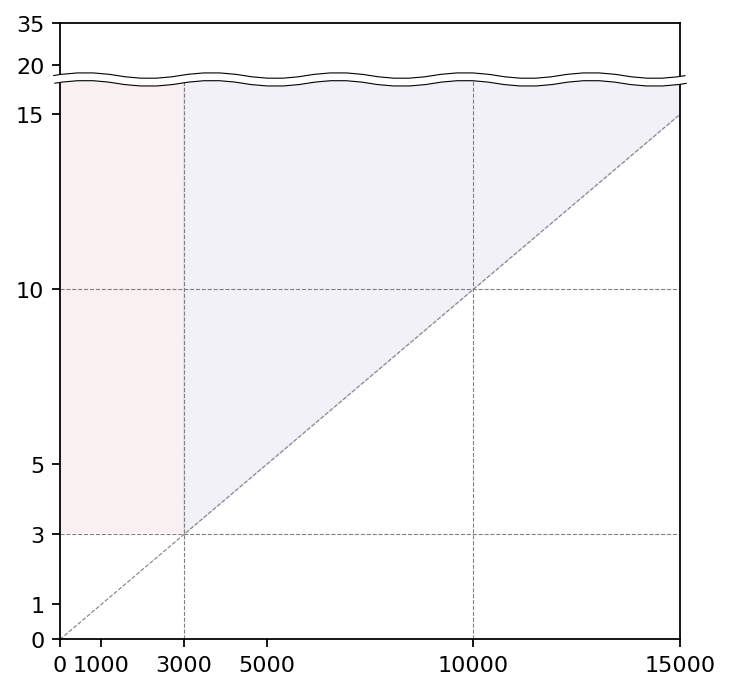

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.path import Path

plt.rcParams.update({'font.size': 10})  
fig, ax = plt.subplots(nrows=2, figsize=(5,5), dpi=160, sharex='col',
                       gridspec_kw={'height_ratios': (1,10)} )
fig.patch.set_facecolor('white') # 背景色を「白」に設定

ava = df['water availability']*1e3
pop = df['population']
ratio = ava/pop
bounds = [0, 100, 300, 1000, 1700, 2500, 10000]
cmap = plt.get_cmap('jet_r', len(bounds))  # 10個の離散値
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig.subplots_adjust(hspace=0.0)  

# 下段サブプロット
ax[1].set_ylim(0,16)
ax[1].set_yticks([0, 1, 3, 5, 10, 15])
ax[1].set_xlim(0,10)
ax[1].set_xticks([0, 1000, 3000, 5000, 10000, 15000])
ax[1].spines['top'].set_visible(False)

# 上段サブプロット
ax[0].set_ylim(15, 35)
ax[0].set_yticks([20, 35])
ax[0].spines['bottom'].set_visible(False)

ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 
d1 = 0.01 # X軸のはみだし量
d2 = 0.01 # ニョロ波の高さ
wn = 21   # ニョロ波の数（奇数値を指定）
pp = (0,d2,0,-d2)
px = np.linspace(-d1,1+d1,wn)
py = np.array([1+pp[i%4] for i in range(0,wn)])
p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))

line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=ax[1].transAxes, zorder=10)

line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=ax[1].transAxes, zorder=10,
                           capstyle='round')
a = ax[1].add_patch(line1)
a = ax[1].add_patch(line2)

# x軸に垂直な線分で区切る
linewidth = 0.5
linecolor = 'grey'
ax[1].axvline(x=3000, color=linecolor, linestyle='--', linewidth=linewidth)
ax[1].axvline(x=10000, color=linecolor, linestyle='--', linewidth=linewidth)

# y軸に垂直な線分で区切る
ax[1].axhline(y=3, color=linecolor, linestyle='--', linewidth=linewidth)
ax[1].axhline(y=10, color=linecolor, linestyle='--', linewidth=linewidth)

# linear
x = np.arange(0, 50*1e3, 1000)
y = np.arange(0, 50)
ax[1].plot(x, y, color=linecolor, linestyle='--', linewidth=linewidth)
ax[1].fill_between(x, y, 20, where=(x > 2999), color='#c7bddf', alpha=0.2)
ax[1].axvspan(0, 2999, 0.19, 5, facecolor='#e2b7c0', alpha=0.2)